Using OOP to Model a Forest Fire
================================

Let's take a simple example that is borrowed from Maksim Tsvetovat and Alexander Kouznetsov's [book on modeling complexity](http://www.worldcat.org/search?q=isbn%3A9781449330835).

We're considering a forest modeled with a numpy array. Every cell can have two values: True means there's a tree there, and False means no tree. At every step, each cell of my forest can grow a new tree with some probability or lose a tree if it is on fire. Lightning can strike any cell with a different probability. Fires are started in cells with trees either by lightning strikes or by fires in adjacent cells. At the end of the step, every cell that started with a fire loses its tree, and newly started fires continue into the next step.

In this example, there is a class called Forest that models the forest. It has attributes representing the locations of trees and the fires, and it has methods to carry out actions described by the model, like growing trees and starting fires.

Let's do some preliminary imports so that we can investigate what is going on in the model:

In [1]:
%matplotlib inline

Technically we don't need numpy for this model, but it makes the simulation run faster, and reflects the way that you probably should write scientific code like this.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Rather than importing from a file, let's define our Forest class directly in this notebook:

In [3]:
class Forest(object):
    def __init__(self, size=(150, 150), p_sapling=0.0025, p_lightning=5.e-6, name=None):
        self.size = size
        self.trees = np.zeros(self.size, dtype=bool)
        self.forest_fires = np.zeros(self.size, dtype=bool)
        self.p_sapling = p_sapling
        self.p_lightning = p_lightning
        if name is not None:
            self.name = name
        else:
            self.name = self.__class__.__name__

    @property
    def num_cells(self):
        return self.size[0] * self.size[1]

    @property
    def tree_fraction(self):
        return self.trees.sum() / float(self.num_cells)

    @property
    def fire_fraction(self):
        return self.forest_fires.sum() / float(self.num_cells)

    def advance_one_step(self):
        self.grow_trees()
        self.start_fires()
        self.burn_trees()

    def grow_trees(self):
        growth_sites = self._rand_bool(self.p_sapling)
        self.trees[growth_sites] = True

    def start_fires(self):
        lightning_strikes = (self._rand_bool(self.p_lightning) & 
            self.trees)
        self.forest_fires[lightning_strikes] = True
        
    def burn_trees(self):
        fires = np.zeros((self.size[0] + 2, self.size[1] + 2), dtype=bool)
        fires[1:-1, 1:-1] = self.forest_fires
        north = fires[:-2, 1:-1]
        south = fires[2:, 1:-1]
        east = fires[1:-1, :-2]
        west = fires[1:-1, 2:]
        new_fires = (north | south | east | west) & self.trees
        self.trees[self.forest_fires] = False
        self.forest_fires = new_fires

    def _rand_bool(self, p):
        return np.random.uniform(size=self.trees.shape) < p

Don't worry about how all of this code is put together.  Instead, lets look at how we can use it.

First, let's create ourselves a forest to play with:

In [4]:
forest = Forest()

Let's take a look at the representation of the trees and the forest fires.  As we noted above, these are NumPy arrays of booleans.

In [5]:
print forest.trees
print forest.forest_fires

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]
[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


We can visualize these a bit better with Matplotlib's `matshow()`.

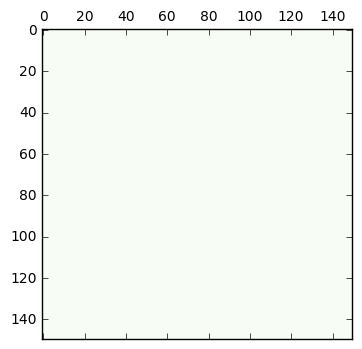

In [6]:
plt.matshow(forest.trees, cmap=plt.cm.Greens)

We can advance time by calling the `advance_one_step()` method of the forest.  Let's advance time, and then plot the trees:

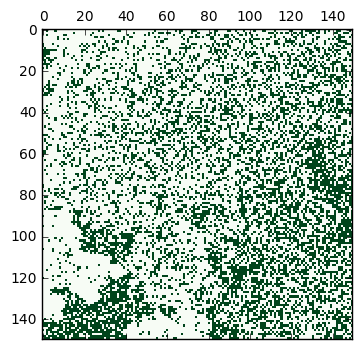

In [15]:
forest.advance_one_step()
plt.matshow(forest.trees, cmap=plt.cm.Greens)

You can re-run this code a few times and see the coverage of trees increase.  Use control-enter (or command-enter on OS X) to run a cell without advancing to the next one.

We also have some attributes which provide useful summary information about our forest, such as the fraction of the area covered with trees.

In [16]:
print forest.tree_fraction

0.343644444444


We can use these methods and attributes on our objects as we would any of the built-in object types.  So for example, we could advance time in a `for` loop and then see how things look.

0.2864


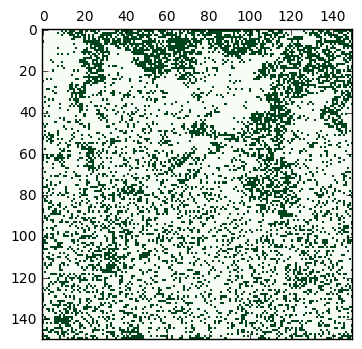

In [19]:
for i in range(500):
    forest.advance_one_step()
plt.matshow(forest.trees, cmap=plt.cm.Greens)
print forest.tree_fraction

If we take a look at the code for `advance_one_step()`, we'll see that it's written in terms that relate to the domain:

    def advance_one_step(self):
        self.grow_trees()
        self.start_fires()
        self.burn_trees()

Advancing one step first grows the trees, then it starts the fires, then the trees get burned.

Without worrying about the implementation (yet) we can use this model to run a little simulation. For instance we can track the tree population over a number of growth cycles. At every step, we'll advance the forest one step and append the number of trees to a list. Then we plot the results.

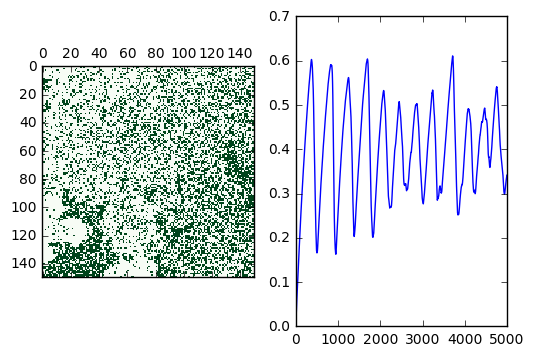

In [10]:
forest = Forest()
tree_fractions = []
for i in range(5000):
    forest.advance_one_step()
    tree_fractions.append(forest.tree_fraction)
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax0.matshow(forest.trees, cmap=plt.cm.Greens)
ax1 = fig.add_subplot(1,2,2)
ax1.plot(tree_fractions)

...and interesting behavior emerges, and you're already thinking, what are the probabilities, and how do I tweak them, and let's run more cycles to see the patterns.

You should feel free to investigate this example further and play around with the parameters some more.

Copyright 2008-2016, Enthought, Inc.<br>Use only permitted under license.  Copying, sharing, redistributing or other unauthorized use strictly prohibited.<br>http://www.enthought.com